In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.dummy import DummyClassifier
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_json('ultimate_data_challenge.json')

In [4]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [5]:
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [6]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


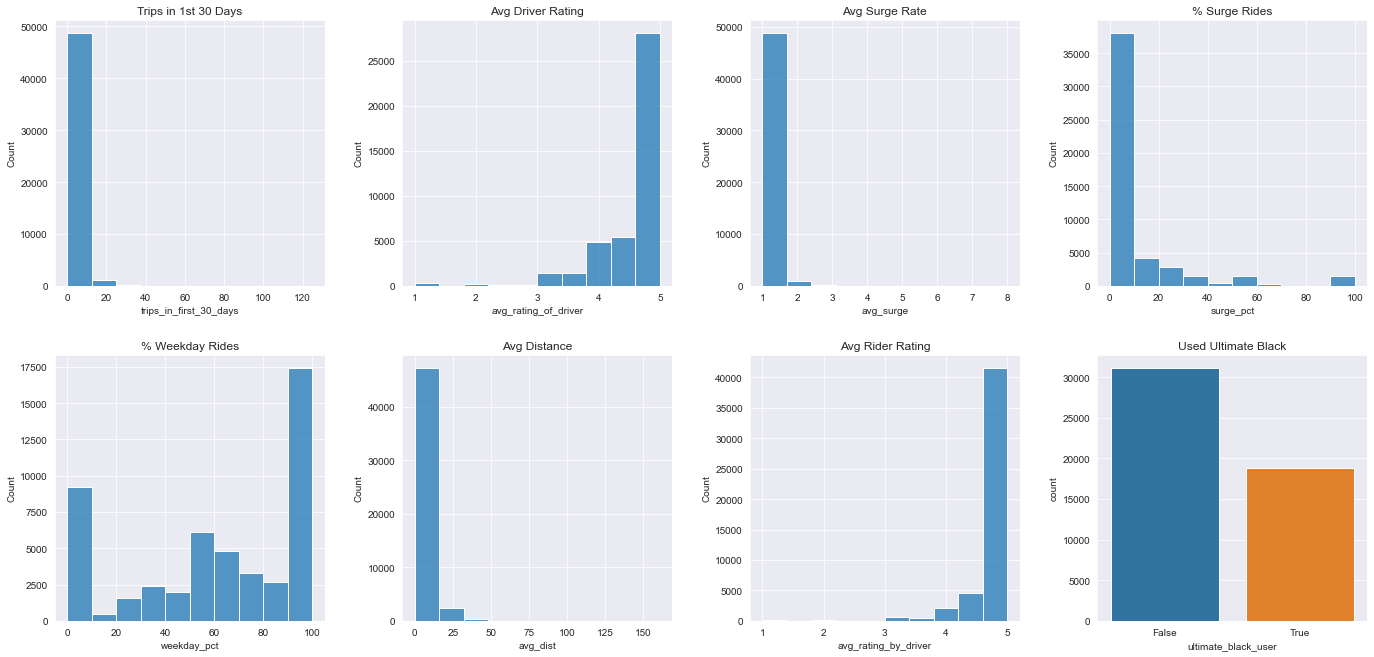

In [8]:
fig, axes = plt.subplots(2,4,figsize=(20,10))
fig.tight_layout(pad=5)
sns.histplot(x='trips_in_first_30_days', data=df, ax=axes[0,0], bins=10)
axes[0,0].set_title('Trips in 1st 30 Days')
sns.histplot(x='avg_rating_of_driver', data=df, ax=axes[0,1], bins=10)
axes[0,1].set_title('Avg Driver Rating')
sns.histplot(x='avg_surge', data=df, ax=axes[0,2], bins=10)
axes[0,2].set_title('Avg Surge Rate')
sns.histplot(x='surge_pct', data=df, ax=axes[0,3], bins=10)
axes[0,3].set_title('% Surge Rides')
sns.histplot(x='weekday_pct', data=df, ax=axes[1,0], bins=10)
axes[1,0].set_title('% Weekday Rides')
sns.histplot(x='avg_dist', data=df, ax=axes[1,1], bins=10)
axes[1,1].set_title('Avg Distance')
sns.histplot(x='avg_rating_by_driver', data=df, ax=axes[1,2], bins=10)
axes[1,2].set_title('Avg Rider Rating')
sns.countplot(x='ultimate_black_user', data=df, ax=axes[1,3])
axes[1,3].set_title('Used Ultimate Black');

Here I can see that there are some issues with missing values, as well as some data type problems and potential issues with outliers.  

The first order of business is to impute the missing values, and then convert the datetime columns to pd.datetime format. 

In [9]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [10]:
# Determining which phone to impute into the missing values for the phone column
df.phone.mode()

0    iPhone
dtype: object

In [11]:
df['avg_rating_of_driver'].fillna(value = df['avg_rating_of_driver'].mean(), axis=0, inplace=True)
df['avg_rating_by_driver'].fillna(value = df['avg_rating_by_driver'].mean(), axis=0, inplace=True)
df['phone'].fillna(value = 'iPhone', axis=0, inplace=True)
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [12]:
df['signup_date'] = pd.to_datetime(df['signup_date'], yearfirst=True)
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], yearfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [14]:
cities = pd.get_dummies(df['city'], prefix='city', drop_first=True)
phone = pd.get_dummies(df['phone'], drop_first=True)

In [15]:
df = df.drop(labels=['city', 'phone'], axis=1)
df = pd.concat([df, cities, phone], axis=1)
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,1,0


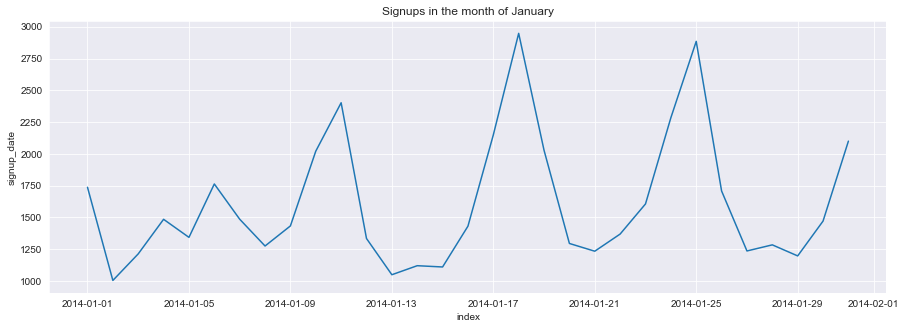

In [16]:
signup_counts = df['signup_date'].value_counts()
signup_counts = signup_counts.reset_index()
signup_counts = signup_counts.sort_values('index')
plt.figure(figsize=(15,5))
sns.lineplot(x='index', y='signup_date', data=signup_counts)
plt.title('Signups in the month of January');

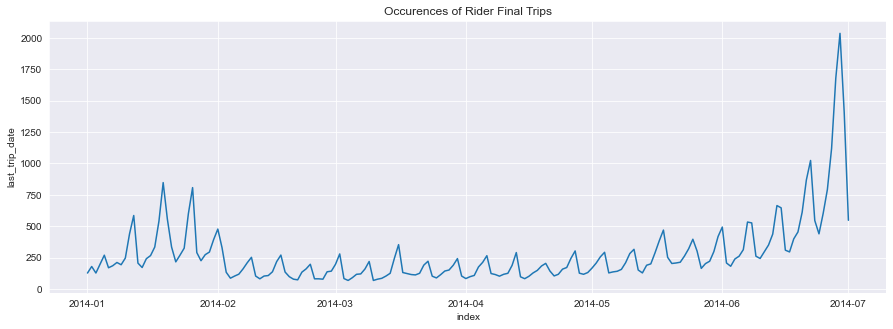

In [17]:
last_counts = df['last_trip_date'].value_counts()
last_counts = last_counts.reset_index()
last_counts = last_counts.sort_values('index')
plt.figure(figsize=(15,5))
sns.lineplot(x='index', y='last_trip_date', data=last_counts)
plt.title('Occurences of Rider Final Trips');

Here we can see the feautres that we're interested in predicting.  

All riders being examined signed up sometime in January, and will be considered churned if their last ride occured within the subsequent 6 months.  If their last ride occured 6 months after their startup date they will be considered 'active'. 

Based on this graph it appears that all signups occured in January, which makes January the first month for all users.  This makes June the 6th month for all users, so we're trying to classify users as being active in the month of June. 

I need to create a new feature that is binary and indicates whether or not users were last active in the month of June.

In [18]:
df['churn'] = 1
df['churn'][(df['last_trip_date'] >= datetime(2014, 6, 1)) & (df['last_trip_date'] < datetime(2014, 7, 1))] = 0

In [19]:
churned_riders = df['churn'].sum()
print('This data set has ', churned_riders, ' churned riders')

This data set has  31744  churned riders


Based on the above criteria it would seem that 64% of riders were not active within their 6th month on the system.  I'm going to use logistic regression in order to build a predictive model and study what factors most influence if a rider will be active in their 6th month.

### Applying classification models to the data

I'll apply three classification models to this data in order to predict churn in order to assess which model provides the most accurate predictions for which riders are active in their 6th month. That model will then be used to provide insights to Ultimate which can be leveraged to improve rider retention. 

1. LogisticRegression
2. Random Forest
3. Grandient Boosting

In [20]:
x = df.drop(['churn', 'last_trip_date', 'signup_date'], axis=1)
y = df['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
logit=LogisticRegression(random_state=42)
logit.fit(x_train, y_train)
pred = logit.predict(x_test)

log_acc = accuracy_score(y_test, pred)
log_f1 = f1_score(y_test, pred)



print('Logit accuracy score: ', log_acc)
print('Logit F1 score: ', log_f1)

Logit accuracy score:  0.7148
Logit F1 score:  0.7910010259416679


In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

rf_acc = accuracy_score(y_test, pred)
rf_f1 = f1_score(y_test, pred)

print('Random Forest accuracy score: ', rf_acc)
print('Random Forest F1 score: ', rf_f1)

Random Forest accuracy score:  0.743
Random Forest F1 score:  0.7971266182507103


In [23]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
pred = gb.predict(x_test)

gb_acc = accuracy_score(y_test, pred)
gb_f1 = f1_score(y_test, pred)

print('Gradient Boosted accuracy score: ', gb_acc)
print('Gradient Boosted F1 score: ', gb_f1)

Gradient Boosted accuracy score:  0.7787
Gradient Boosted F1 score:  0.829808505729447


In [24]:
"""params = {'n_estimators':np.arange(100,10000), 'max_depth':np.arange(2,6), 'min_samples_split': np.arange(2,5)}
grade = GradientBoostingClassifier()
# Had a friend tell me that iterating 60 times is just as good as 100 over 90% of the time
gradient = RandomizedSearchCV(grade, param_distributions=params, n_iter=60)
gradient.fit(x_train, y_train)
grade_best_score = gradient.best_score_
grade_best_params = gradient.best_params_
print('GB best score: ', grade_best_score)
print('GB best parameters: ', grade_best_params)"""

"params = {'n_estimators':np.arange(100,10000), 'max_depth':np.arange(2,6), 'min_samples_split': np.arange(2,5)}\ngrade = GradientBoostingClassifier()\n# Had a friend tell me that iterating 60 times is just as good as 100 over 90% of the time\ngradient = RandomizedSearchCV(grade, param_distributions=params, n_iter=60)\ngradient.fit(x_train, y_train)\ngrade_best_score = gradient.best_score_\ngrade_best_params = gradient.best_params_\nprint('GB best score: ', grade_best_score)\nprint('GB best parameters: ', grade_best_params)"

In [25]:
gb = GradientBoostingClassifier(n_estimators=505, min_samples_split=2, max_depth=3, random_state=42)
gb.fit(x_train, y_train)
pred = gb.predict(x_test)

gb_acc2 = accuracy_score(y_test,pred)
gb_f1_2 = f1_score(y_test,pred)

print('Optimized Gradient Boosted accuracy score: ', gb_acc2)
print('Optimized Gradient Boosted F1 score: ', gb_f1_2)

Optimized Gradient Boosted accuracy score:  0.7834
Optimized Gradient Boosted F1 score:  0.8333589783043545


In [26]:
dumdum = DummyClassifier(random_state=42)
dumdum.fit(x_train, y_train)
pred = dumdum.predict(x_test)

dacc = accuracy_score(y_test, pred)
df1 = f1_score(y_test, pred)

print('Dummy accuracy score: ', dacc)
print('Dummy f1 score: ', df1)

Dummy accuracy score:  0.6313
Dummy f1 score:  0.7739839391896034


It seems that we are able to predict churn with a high level of accuracy, particularly when compared to a dummy classifier.  The next step is to extract insights as to what features contribute the most heavily to churn.

In [27]:
weights = gb.feature_importances_

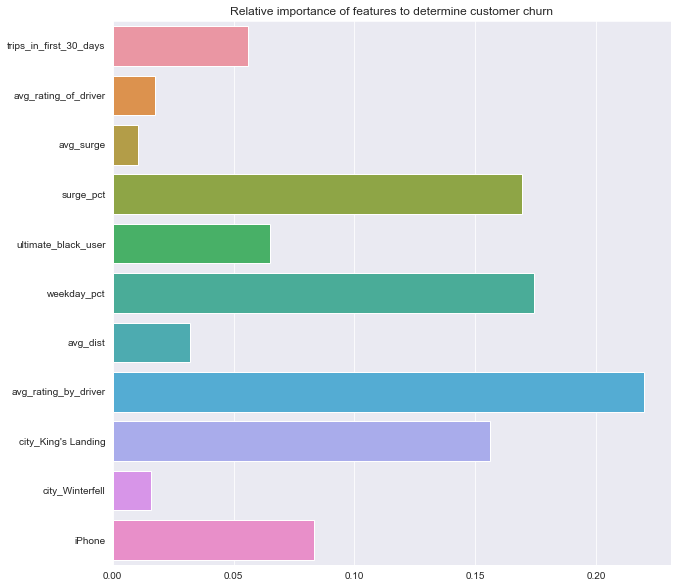

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x= weights, y= x_train.columns, orient='h')
plt.title('Relative importance of features to determine customer churn');

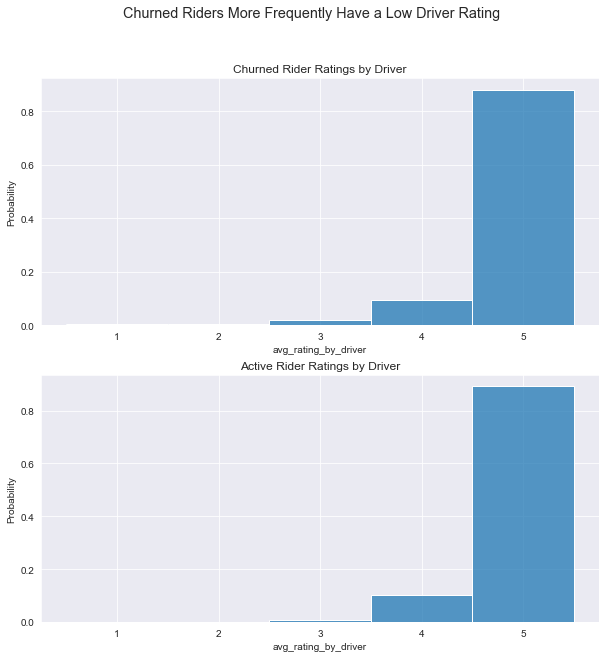

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
sns.histplot(x='avg_rating_by_driver', discrete=True, data=df[df['churn']==1], ax=ax1, stat='probability')
sns.histplot(x='avg_rating_by_driver', discrete=True, data=df[df['churn']==0], ax=ax2, stat='probability')
ax2.set_title('Active Rider Ratings by Driver')
ax1.set_title('Churned Rider Ratings by Driver')
fig.suptitle('Churned Riders More Frequently Have a Low Driver Rating', size='x-large');

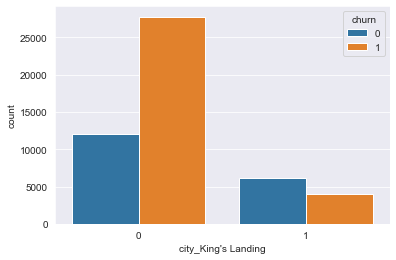

In [36]:
sns.countplot(x='city_King\'s Landing', hue='churn', data=df);

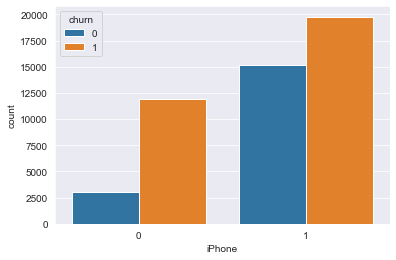

In [38]:
sns.countplot(x='iPhone', hue='churn', data=df);

Text(0.5, 0.98, 'Churned Riders More Frequently Have a Low Driver Rating')

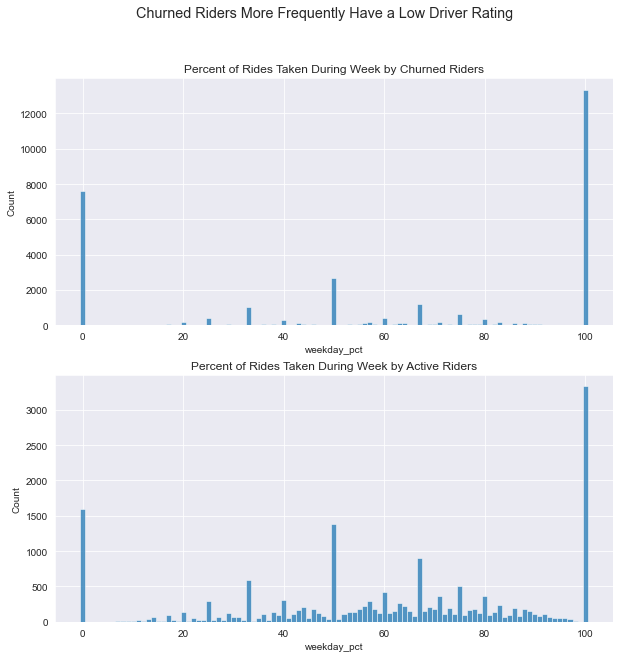

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
sns.histplot(x='weekday_pct', discrete=True, data=df[df['churn']==1], ax=ax1)
sns.histplot(x='weekday_pct', discrete=True, data=df[df['churn']==0], ax=ax2)
ax2.set_title('Percent of Rides Taken During Week by Active Riders')
ax1.set_title('Percent of Rides Taken During Week by Churned Riders')
fig.suptitle('Churned Riders More Frequently Have a Low Driver Rating', size='x-large')

Using the feature weights attribute for the churn prediction model we're able to draw several conclusions about what influences rider churn for the Ultimate Rideshare App:

1. Riders who use the app on both a mix of weekend and weekday rides are more likely to be active after 6 months.

2. iPhone users are much more likely to be users after 6 months, AND are far more prevalent on the app.

3. Users in King's Landing are much less likely to churn than those in Winterfell - this should be looked at in more depth.

4. Riders with lower ratings generally tend to churn, while this is a strong predictor these riders should be allowed to go.